<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Restaurant revenue data analysis</div>

 

The restaurant and hospitality industry is growing and growing every day.
Modernization of work processes is also inevitable:
over the past 3 years, the number of software products for restaurants and cafes has grown by 137%.
The number of public catering organizations is growing by approximately 6,000 every year. companies per year.

Restaurant software collects and stores a huge amount of data, but only if employees correctly enter it into the program.

Based on the collected data, you can increase potential revenue and performance, and most importantly, reduce costs.

I requested data on the cashier shifts of the bar where I worked in order to analyze:

- Factors affecting the amount of revenue;
- the dynamics of revenue, taking into account the rise in prices;
- efficiency of workforce distribution;
- and find new insights;
- emerging conclusions.    

![jupyter](data/755928949871139.jpeg)

### Данные:

- Учет.день  - Date
- №кассы - Number of equipment
- №смены - Number of shift
- Касса - Equipment group
- Открыта - Date and time of the opening of the cash register shift
- Закрыта - Date and time of the closing of the cash register shift
- Отв. кассир - Cashier name
- Менеджер - Manager name
- Нач.остаток - Cash balance at the cash desk at the time of opening the cash register shift
- Суммапродаж - Total revenue received per shift
- Списания - Non-cash refunds
- Внесения - Deposited cash amount
- Изъятия - Cash seized
- Выручка - Total cash received per shift
- Конечныйостаток - Cash balance at the cash desk at the time of closing the cash register shift

In [40]:
# Import required libraries

import pandas as pd
import numpy as np
import re
import datetime as dt
from scipy.stats import shapiro


#work with pdf files

import camelot      
from os import walk

# visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12, 7)})
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)

%matplotlib inline

In [15]:
# The function of collecting information from pdf files

def weather(files):
    data = pd.DataFrame()
    for file in files:
        table = camelot.read_pdf(f'data/wether-diary/{file}')
        df = table[0].df
        df.drop(columns=range(3, 11), index=[0,1], inplace=True)
        df.columns = ['day', 'temp', 'press']
        df['month'] = file[:-4]
        data = pd.concat([data, df], ignore_index=True)
    return data
    

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Data</div>


### Restaurant's data

In [8]:
data_22 = pd.read_excel('data/Кассовые смены_1.xlsx', convert_float=True)
data_21 = pd.read_excel('data/Кассовые смены 21 (1).xlsx', convert_float=True)
data_22.head()

,Учет.день,№кассы,№смены,Касса,Открыта,Закрыта,Отв. кассир,Менеджер,Нач.остаток,Суммапродаж,Списания,Внесения,Изъятия,Выручка,Конечныйостаток,Разница,Состояние,Фискаль-ный номер,Unnamed: 18
0,18.11.2022,55,550,Основная группа,18.11.2022 15:50,NaN,NaN,Пирс <3 617343,"0,00",0,"0,00","1 950,01",0,0,"0,00","0,00",Открыта,0,NaN
1,17.11.2022,55,549,Основная группа,17.11.2022 16:34,18.11.2022 1:04,Пирс <3 617343,Руслан 617343,"0,00",58823.9,"2 700,00","2 034,01",16407.9,1950.01,"0,00","-1 950,01",Не принята,0,NaN
2,14.11.2022,1,548,Основная группа,14.11.2022 15:39,15.11.2022 0:32,Руслан 617343,Руслан 617343,"0,00",28564,"0,00","0,01",5010,2034.01,"0,00","-2 034,01",Не принята,48,NaN
3,13.11.2022,1,547,Основная группа,13.11.2022 15:28,14.11.2022 0:46,Пирс <3 617343,Пирс <3 617343,"0,00",43302.5,"0,00","0,01",0,0.01,"0,00","-0,01",Не принята,0,NaN
4,12.11.2022,1,546,Основная группа,12.11.2022 15:44,13.11.2022 4:46,Пирс <3 617343,Руслан 617343,"0,00",334624,"0,00","13 098,67",26668.7,0,"0,00","0,00",Не принята,46,NaN


In [9]:
data_21.head()

,Учет.день,№кассы,№смены,Касса,Открыта,Закрыта,Отв. кассир,Менеджер,Нач.остаток,Суммапродаж,Списания,Внесения,Изъятия,Выручка,Конечныйостаток,Разница,Состояние,Фискаль-ный номер,Unnamed: 18
0,2021-12-31 00:00:00,1,238,Основная группа,2021-12-31 21:42:00,2022-01-01 06:52:00,Игорь Антонов 617359,Сеня 617354,"0,00",91213.5,"113 120,00","10 621,09",24224.7,8886.35,"0,00","-8 886,35",Не принята,169,NaN
1,2021-12-30 00:00:00,1,237,Основная группа,2021-12-30 15:57:00,2021-12-30 23:06:00,Руслан 617343,Елена 617352,"0,00",107329,"0,00","15 624,11",13272.6,5337.09,"0,00","-5 337,09",Не принята,168,NaN
2,2021-12-29 00:00:00,1,236,Основная группа,2021-12-29 14:26:00,2021-12-29 22:58:00,Руслан 617343,Елена 617352,"0,00",92127,"0,00","25 599,11",15895,15624.1,"0,00","-15 624,11",Не принята,167,NaN
3,2021-12-28 00:00:00,1,235,Основная группа,2021-12-28 15:30:00,2021-12-28 23:03:00,Дима 617342,Игорь Виноградов 617359,"0,00",71444.5,"0,00","5 385,11",33017,2081.11,"0,00","-2 081,11",Не принята,166,NaN
4,2021-12-27 00:00:00,1,234,Основная группа,2021-12-27 17:56:00,2021-12-27 22:59:00,Вика 617356,Сеня 617354,"0,00",3720,"0,00","9 101,11",5183,3918.11,"0,00","-3 918,11",Не принята,165,NaN


In [10]:
data_21.shape, data_22.shape

((309, 19), (392, 19))

### Dollar exchange rate data

In [11]:
dollar = pd.read_excel('data/dollar.xlsx')
dollar = dollar[['data', 'curs']]
dollar.head()

,data,curs
0,2022-12-13,62.7674
1,2022-12-10,62.3813
2,2022-12-09,62.5722
3,2022-12-08,62.9372
4,2022-12-07,62.9103


In [12]:
dollar.shape

(481, 2)

### Weather data

Data on weather conditions for the last 2 years are stored in PDF files for each month separately.
I will write a function for collecting data and converting to a single dataset from PDF files.

In [16]:
data_weather = weather(next(walk('data/wether-diary'), (None, None, []))[2][1:])
data_weather.head()

,day,temp,press,month
0,1,-5,755,1-2022
1,2,-7,759,1-2022
2,3,-6,748,1-2022
3,4,-4,745,1-2022
4,5,+2,740,1-2022


In [17]:
data_weather.shape

(631, 4)

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Data cleaning</div>

Received two xlsx tables for 2021 and 2022.

Data uploaded incorrectly: duplicate headers and difference in date formats. 
Let's prepare them for the merger.



Since the reporting was registered incorrectly in the program, most of the signs do not carry any information.

We will consider them uninformative and get rid of them.

#### Valuable features:
- containing dates,
- amount of sales (total revenue per shift),
- revenue (Cash received per shift).

In [20]:
# Drop headers
rows_to_drop = data_21[data_21['Учет.день'] == 'Учет.день']
rows_to_drop_2 = data_22[data_22['Учет.день'] == 'Учет.день']

data_21.drop(rows_to_drop.index, axis=0, inplace=True)
data_22.drop(rows_to_drop_2.index, axis=0, inplace=True)

In [21]:
# Type to datetime

data_21['date'] = pd.to_datetime(data_21['Учет.день'], format='%d.%m.%Y' )
data_22['date'] = pd.to_datetime(data_22['Учет.день'], format='%d.%m.%Y' )


In [22]:
# Merge data

df = pd.concat([data_21, data_22], axis=0, ignore_index=True)
df.shape

(676, 20)

In [23]:
df.drop(labels=['№кассы',
                '№смены',
                'Касса',
                'Отв. кассир',
                'Менеджер',
                'Фискаль-ный номер',
                'Состояние',
                'Списания',
                'Открыта',
                'Закрыта',
                'Внесения',
                'Конечныйостаток',
                'Нач.остаток',
                'Разница',
                'Состояние',
                'Unnamed: 18',
               'Изъятия'], axis=1, inplace=True) 

Presumably, the shifts closed incorrectly - this is evidenced by repeated dates. Perhaps, on some days, two work shifts were opened in the system. This noise can be corrected in the data using grouping.

Since we will count repetitions for one day, except for the date, the remaining indicators are summed up.

In [24]:
df['date'].value_counts().sort_values(ascending=False).head(10)

2022-05-23    2
2022-06-24    2
2022-02-21    2
2022-10-11    2
2022-02-11    2
2022-02-19    2
2021-09-17    2
2022-05-05    2
2021-04-06    2
2022-02-12    2
Name: date, dtype: int64

In [25]:
df = df.loc[df['Суммапродаж'] != 0.0]

In [26]:
df = df.groupby(['date']).agg('sum').reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         548 non-null    datetime64[ns]
 1   Суммапродаж  548 non-null    float64       
 2   Выручка      548 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 13.0 KB


In [27]:
# date to datetime

data_weather['date'] =data_weather['day']+ '-' + data_weather['month'].astype(str)
data_weather['date'] = pd.to_datetime(data_weather['date'])

data_weather.drop(columns=['day', 'month'], inplace=True)

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Feautures generation</div>

### There are few features in the data, I will generate several additional and legitimate ones in relation to the bar's revenue


- 'workers' - Number of employees involved in the work shift.
- 'temp' - Air temperature in the Central region of St. Petersburg in Celsius.
- 'curs' - The exchange rate of the dollar against the ruble.
- 'press' - Atmospheric pressure.
- 'weekend' - Whether the day is a weekend (0 - Weekday; 1 - Weekend)
- 'revenue_new' - The revenue of the bar, taking into account increased prices.

#### I requested a valid employee schedule:

- Monday and Tuesday: 3 people per shift
- Wednesday and Thursday: 4 people per shift
- Friday and Saturday: 6 people per shift
- Sunday: 3 people per shift






In [28]:
# Weekday, month, year

df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Weekend

day = [df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday']),
       df['weekday'].isin(['Friday', 'Saturday'])]
weekend = [0, 1]


df['weekend'] = np.select(day, weekend, default='Not satisfied')

#Workers

weekday = [df['weekday'].isin(['Monday', 'Tuesday']),
       df['weekday'].isin(['Wednesday', 'Thursday']),
       df['weekday'].isin(['Friday', 'Saturday']),
       df['weekday'] == 'Sunday']
team = [3, 4, 6, 3]


df['workers'] = np.select(weekday, team, default='Not satisfied')

# New price

I was also informed that there were price increases:
- July 30, 2021 at 15%
- April 15, 2022 by 15%

I will add the feature revenue_new, which reflects the revenue taking into account the rise in prices, and explore it.

In [29]:
# Функция вычисления выручки с учетом поднятых цен 

def new_prices(row):
    
    # Все цены до первого поднтия цен будут увеличены на 15% дважды
    if row['date'] < pd.to_datetime('2021-07-30'):
        val = row['Суммапродаж'] * 1.15 * 1.15
    
    # Все цены до  второго поднтия цен и после первого будут увеличены на 15% 
    elif (row['date'] < pd.to_datetime('2022-04-15')) and (row['date'] > pd.to_datetime('2021-07-30')):
        val = row['Суммапродаж'] * 1.15
        
    else:
        val = row['Суммапродаж']
        
    return val

In [30]:
df['revenue_new'] = df.apply(new_prices, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         548 non-null    datetime64[ns]
 1   Суммапродаж  548 non-null    float64       
 2   Выручка      548 non-null    float64       
 3   weekday      548 non-null    object        
 4   month        548 non-null    int64         
 5   year         548 non-null    int64         
 6   weekend      548 non-null    object        
 7   workers      548 non-null    object        
 8   revenue_new  548 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 38.7+ KB


In [32]:
# Press and Temp

df = pd.merge_asof(df.sort_values(by='date'),\
                   data_weather.sort_values(by='date'), on='date', direction='nearest')

In [33]:
# Curs

df = pd.merge_asof(df.sort_values(by='date'),\
                   dollar.sort_values(by='data'),\
                   left_on='date', right_on='data', direction='nearest')

In [34]:
num = ['Суммапродаж', 'Выручка', 'temp', 'press', 'workers']

for i in num:
    df[i] = pd.to_numeric(df[i])

In [35]:
df.drop(columns='data', inplace=True)
df.dropna(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         547 non-null    datetime64[ns]
 1   Суммапродаж  547 non-null    float64       
 2   Выручка      547 non-null    float64       
 3   weekday      547 non-null    object        
 4   month        547 non-null    int64         
 5   year         547 non-null    int64         
 6   weekend      547 non-null    object        
 7   workers      547 non-null    int64         
 8   revenue_new  547 non-null    float64       
 9   temp         547 non-null    float64       
 10  press        547 non-null    float64       
 11  curs         547 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 55.6+ KB


<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Exploratory data analysis</div>

 

Now that the data has been converted to the correct types and filled with valid information, let's move on to the analysis of variables.

In [37]:
# Let's have a look on satatistics 

df.describe().round(2)

,Суммапродаж,Выручка,month,year,workers,revenue_new,temp,press,curs
count,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00,547.00
mean,113381.33,12045.11,6.85,2021.56,4.18,125927.42,11.23,759.33,71.05
std,99949.12,11803.12,3.08,0.50,1.25,106284.02,10.28,8.45,11.00
min,2609.50,0.00,1.00,2021.00,3.00,3000.92,-15.00,728.00,51.16
25%,43525.50,4057.10,5.00,2021.00,3.00,48159.10,4.00,755.00,61.37
50%,76152.00,8354.36,7.00,2022.00,4.00,83828.50,11.00,760.00,72.92
75%,164593.25,16546.71,9.00,2022.00,6.00,189609.31,19.00,764.00,74.63
max,464169.00,84229.30,12.00,2022.00,6.00,464169.00,36.00,785.00,120.38


# Revenue and cash

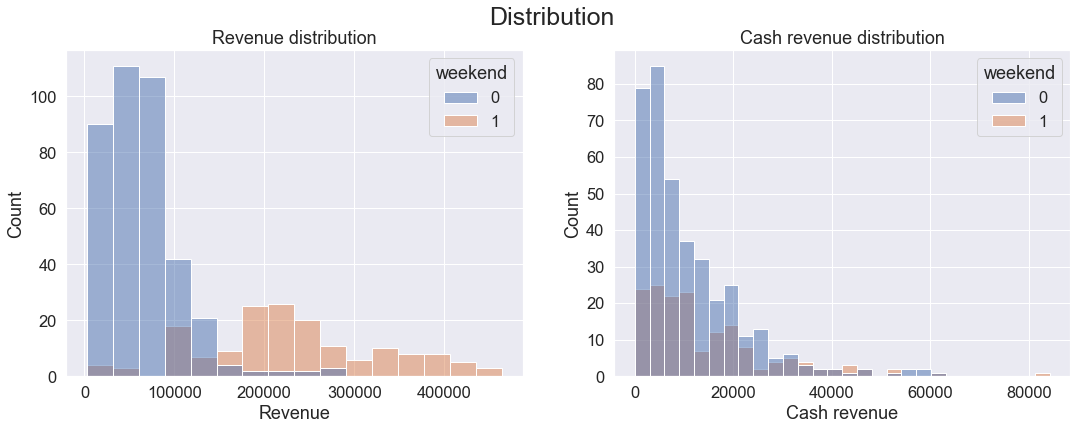

In [38]:
f, ax = plt.subplots(1, 2, figsize=(18,6))

f.suptitle('Distribution', size=25)

sns.histplot(x='Суммапродаж', data=df, hue='weekend', ax=ax[0])
sns.histplot(x='Выручка', data=df, hue='weekend', ax=ax[1])



ax[0].set_xlabel('Revenue')
ax[0].set_title('Revenue distribution', size=18)

ax[1].set_xlabel('Cash revenue')
ax[1].set_title('Cash revenue distribution', size=18)
            
            
plt.show()


The revenue distribution appears to be log-normal, which is expected when analyzing revenues.

The expected trend for the bar is that revenue reaches its highest volumes on weekends.


The graph shows that revenues are growing towards the weekend, but the amount of cash received remains approximately the same.

In [39]:
cash = df.groupby(['weekend'])['Выручка'].agg('median').reset_index()
revenue = df.groupby(['weekend'])['Суммапродаж'].agg('median').reset_index()

cash_grow = cash['Выручка'][1]/cash['Выручка'][0]*100 - 100
revenue_grow = revenue['Суммапродаж'][1]/revenue['Суммапродаж'][0]*100 - 100



print(f'Average revenue rises over the weekend by about {round(revenue_grow)}% \nWhile the amount of cash is only on {round(cash_grow)}%')


Average revenue rises over the weekend by about 282% 
While the amount of cash is only on 45%


# Year

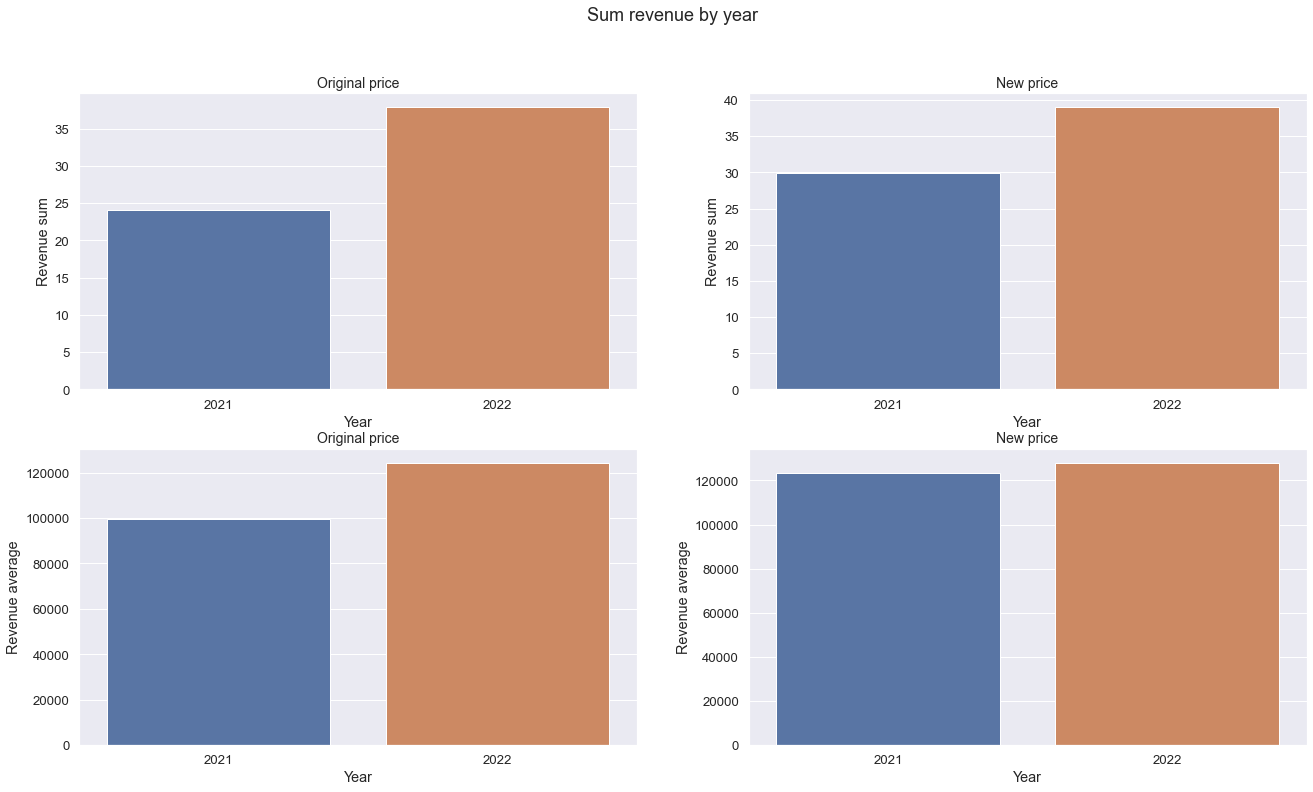

Revenue sum increased with old prices - 57%
Revenue sum increased with new prices - 31%

Revenue in average increased with old prices - 25%
Revenue in average increased with new prices - 4%



In [41]:
year_rev = df.groupby('year').agg({'Суммапродаж':'sum'}).sort_index().reset_index()
year_rev_new = df.groupby('year').agg({'revenue_new':'sum'}).sort_index().reset_index()

year_rev_avg = df.groupby('year').agg({'Суммапродаж':'mean'}).sort_index().reset_index()
year_rev_avg_new = df.groupby('year').agg({'revenue_new':'mean'}).sort_index().reset_index()

year_rev['Суммапродаж'] = year_rev['Суммапродаж'] / 1000000
year_rev_new['revenue_new'] = year_rev_new['revenue_new'] / 1000000


rev_new_sum = year_rev_new['revenue_new'][1]/year_rev_new['revenue_new'][0]*100 - 100
rev_sum = year_rev['Суммапродаж'][1]/year_rev['Суммапродаж'][0]*100 - 100

rev_avg_new = year_rev_avg_new['revenue_new'][1]/year_rev_avg_new['revenue_new'][0]*100 - 100
rev_avg = year_rev_avg['Суммапродаж'][1]/year_rev_avg['Суммапродаж'][0]*100 - 100


f, ax = plt.subplots(2, 2, figsize=(22,12))

f.suptitle('Sum revenue by year', size=18)

sns.barplot(x='year', y='Суммапродаж', data=year_rev, ax=ax[0][0])
sns.barplot(x='year', y='revenue_new', data=year_rev_new, ax=ax[0][1])


sns.barplot(x='year', y='Суммапродаж', data=year_rev_avg, ax=ax[1][0])
sns.barplot(x='year', y='revenue_new', data=year_rev_avg_new, ax=ax[1][1])


ax[0][0].set_xlabel('Year')
ax[0][0].set_ylabel('Revenue sum')
ax[0][0].set_title('Original price', size=14)

ax[0][1].set_xlabel('Year')
ax[0][1].set_ylabel('Revenue sum')
ax[0][1].set_title('New price', size=14)


ax[1][0].set_xlabel('Year')
ax[1][0].set_ylabel('Revenue average')
ax[1][0].set_title('Original price', size=14)

ax[1][1].set_xlabel('Year')
ax[1][1].set_ylabel('Revenue average')
ax[1][1].set_title('New price', size=14)

            
            
plt.show()

print(f'Revenue sum increased with old prices - {round(rev_sum)}%\nRevenue sum increased with new prices - {round(rev_new_sum)}%\n')
print(f'Revenue in average increased with old prices - {round(rev_avg)}%\nRevenue in average increased with new prices - {round(rev_avg_new)}%\n')



In 2022, total revenue increased by 57% compared to the previous year.
Price-adjusted, revenue has grown by 30% from the previous year, a positive trend is also observed.

On average, daily revenue for the year increased by 26%, but taking into account the rise in prices, we can say that the average revenue per day increased by only 5%.

Initially, it is possible to draw conclusions about the successful performance of the company in comparison with the previous year. Let's try to delve into the data.

# Month & Weekday

Let's look at the distribution of revenue by day of the week, month and compare 2022 and 2021 for trends.

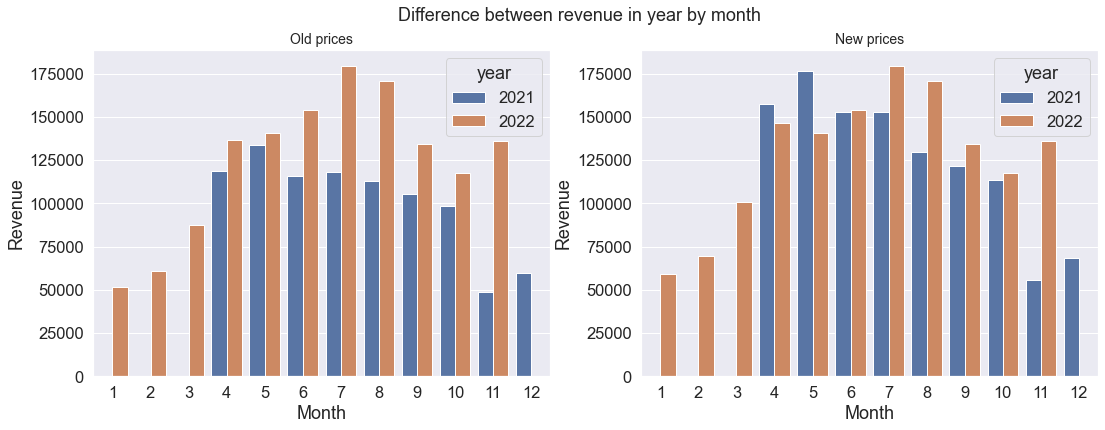

In [31]:
f, ax = plt.subplots(1, 2, figsize = (18,6))

f.suptitle('Difference between revenue in year by month', fontsize=18)

sns.barplot(x='month', y='Суммапродаж', data=df, ci=None, hue='year', ax=ax[0])
sns.barplot(x='month', y='revenue_new', data=df, ci=None, hue='year', ax=ax[1])


ax[0].set_title('Old prices', fontsize=14)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Revenue')

ax[1].set_title('New prices', fontsize=14)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Revenue')



plt.show()



The summer season and summer are characterized by a significant increase in revenue. In 2021, April and May became the most profitable, and in 2022 - July and August.
Also, the average revenue for 2022 is higher than in 2021.


Based on new prices, on average, spring 2021 revenue was higher than 2022 revenue for the same period.

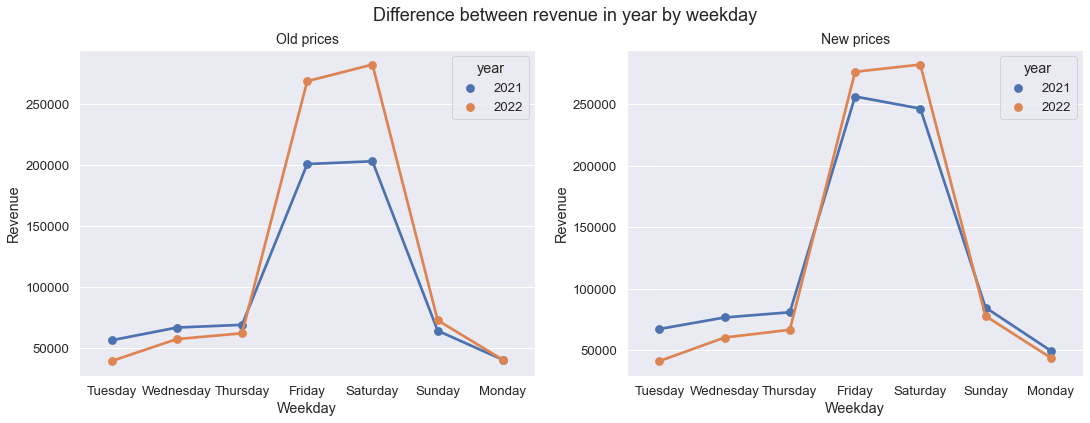

In [42]:
f, ax = plt.subplots(1, 2, figsize = (18,6))

f.suptitle('Difference between revenue in year by weekday', fontsize=18)

sns.pointplot(x='weekday', y='Суммапродаж', data=df, hue='year', ci=None, estimator=np.median, ax=ax[0])
sns.pointplot(x='weekday', y='revenue_new', data=df, hue='year', ci=None, estimator=np.median, ax=ax[1])


ax[0].set_title('Old prices', fontsize=14)
ax[0].set_xlabel('Weekday')
ax[0].set_ylabel('Revenue')

ax[1].set_title('New prices', fontsize=14)
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Revenue')



plt.show()



Not counting weekends, the most profitable are Sunday and Thursday.

An interesting observation is that the average revenues of the days of the week for different years have similar trends, but significant differences between 2021 and 2022 are observed only on weekends. On weekdays, 2022 numbers are lower than 2021.

Taking into account the increase in prices, positive dynamics is observed only at the weekend. From Sunday to Thursday, the average revenue was lower.

# Weekend

In [33]:
df.weekend = pd.to_numeric(df.weekend)

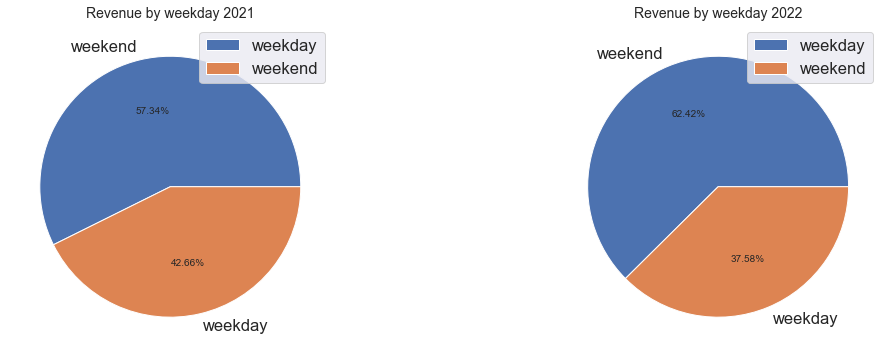

In [34]:
df_21 = df[df['year'] == 2021]
df_22 = df[df['year'] == 2022]

weekend_21 = df_21.loc[df['weekend'] == 1.0, 'Суммапродаж'].sum()
weekday_21 = df_21.loc[df['weekend'] == 0, 'Суммапродаж'].sum()

weekend_22 = df_22.loc[df['weekend'] == 1.0, 'Суммапродаж'].sum()
weekday_22 = df_22.loc[df['weekend'] == 0, 'Суммапродаж'].sum()


values_21 = [weekend_21, weekday_21]
values_22 = [weekend_22, weekday_22]
labels = ['weekend', 'weekday']


f, ax = plt.subplots(1, 2, figsize = (18,6))


wedges, texts, autotexts = ax[0].pie(values_21, labels=labels, autopct='%1.2f%%')
wedges, texts, autotexts = ax[1].pie(values_22, labels=labels, autopct='%1.2f%%')

ax[0].set_title('Revenue by weekday 2021', fontsize=14)
ax[1].set_title('Revenue by weekday 2022', fontsize=14)
ax[0].legend(['weekday', 'weekend'])
ax[1].legend(['weekday', 'weekend'])

plt.show()

62% of revenue for 2021 came on weekends, 38% on weekdays.

The distribution of revenue was more equal between weekends and weekdays in 2021.

# Temp Press

Let's look at the relationship between weather conditions and bar revenue.

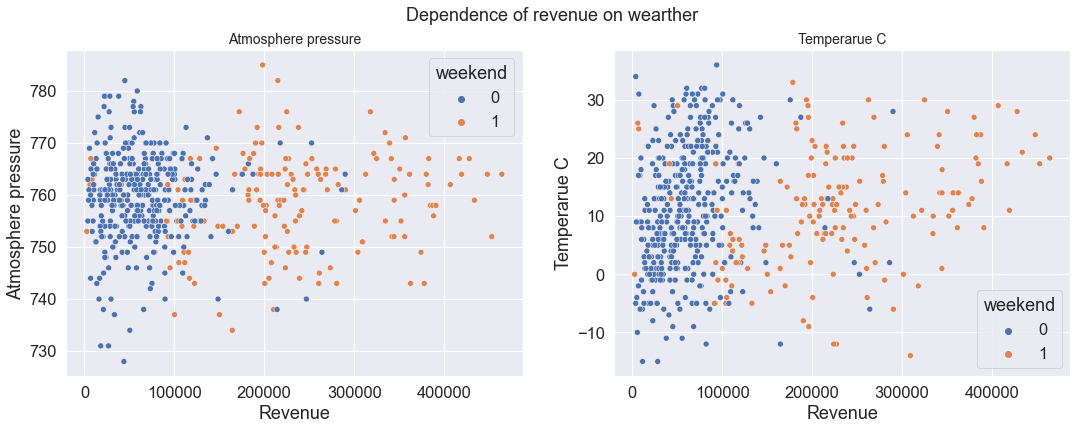

In [35]:
f, ax = plt.subplots(1, 2, figsize = (18,6))

f.suptitle('Dependence of revenue on wearther', fontsize=18)

sns.scatterplot(x='Суммапродаж', y='press', data=df, hue='weekend', ax=ax[0])
sns.scatterplot(x='Суммапродаж', y='temp', data=df, hue='weekend', ax=ax[1])


ax[0].set_title('Atmosphere pressure', fontsize=14)
ax[0].set_xlabel('Revenue')
ax[0].set_ylabel('Atmosphere pressure')

ax[1].set_title('Temperarue C', fontsize=14)
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Temperarue C')



plt.show()

In [36]:
np.corrcoef(df['temp'], df['Суммапродаж'])[1][0]

0.1520247227831077

We can say that the largest revenues are observed at positive temperatures, but we also found out earlier that summer time is the most profitable, since the tourist season is in St. Petersburg.

The correlation coefficient is rather weak, it is difficult to say that the air temperature really affects the purchasing power.

Atmospheric pressure also does not have a tangible effect on purchasing power.

# Curs

How did revenue change with changes in the dollar exchange rate against the ruble

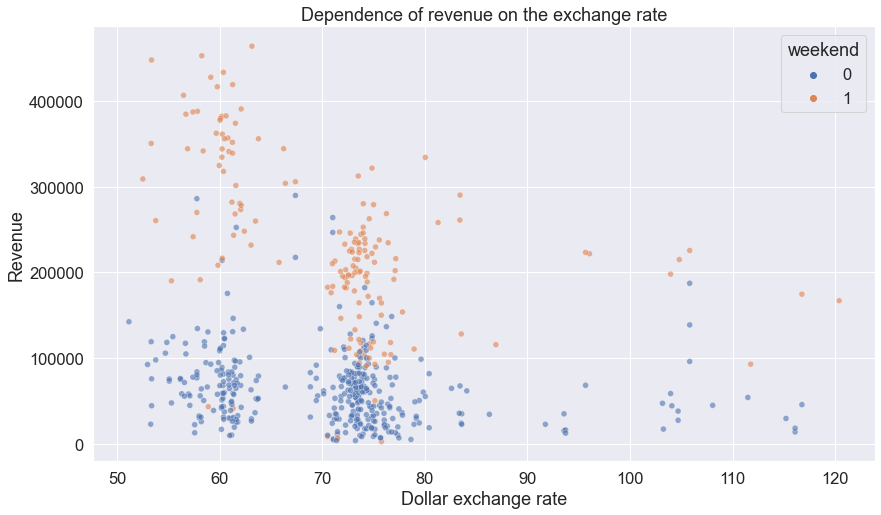

In [37]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='curs', y='Суммапродаж', data=df, hue='weekend', alpha=0.6)


plt.title('Dependence of revenue on the exchange rate', size=18)
plt.xlabel('Dollar exchange rate')
plt.ylabel('Revenue')

plt.show()

In [38]:
np.corrcoef(df['press'], df['temp'])[1][0]

0.19509716277654557

With the growth of the American dollar against the ruble, high revenues were observed less frequently.
The correlation coefficient is about 0.2 - quite low.

The fall in revenues may be due not only to the dollar exchange rate, but also to the events that caused the exchange rate to rise: the foreign political situation, economic sanctions etc.

# Workers

In [39]:
df['revenue_by_worker'] = df['Суммапродаж'] / df['workers'] 
df['revenue_by_worker'].mean()

24737.645208714184

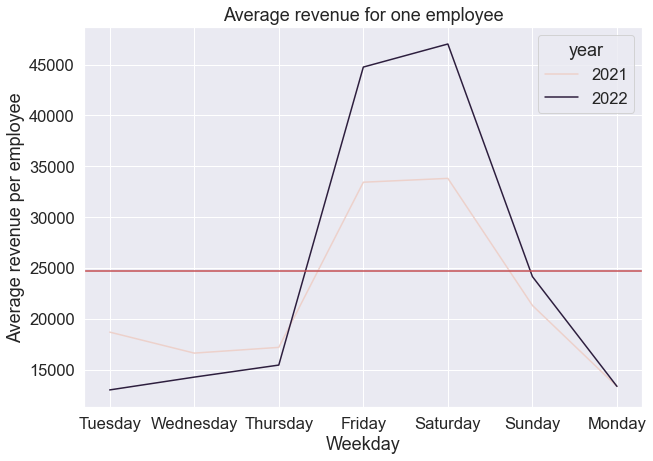

In [40]:
plt.figure(figsize=(10,7))


av_rev_by_w = df['revenue_by_worker'].mean()

g = sns.lineplot(x='weekday', y='revenue_by_worker', data=df, ci=None, estimator=np.median, hue='year')
g.axhline(av_rev_by_w, c='r')


plt.title('Average revenue for one employee', size=18)
plt.xlabel('Weekday')
plt.ylabel('Average revenue per employee')


plt.show()


In [41]:
av_rev_by_w = df['revenue_by_worker'].median()




The red line shows the average revenue per employee,
the curves show the average revenue per employee in different weeks.

Thus, we can say that on Tuesday and Monday the wage fund is distributed excessively. While on weekends there are not enough employees on the shift.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Results</div>

 

## In the course of the analysis of the data, I found out:

  - The bar earned 57% more in 2022 than in 2021. But with the increase in prices, on average per day, the bar began to earn 5% more.

- The summer season is the most profitable:
                  - 2021 peak months - April, May.
                  - 2022 peak months - July, August.

- The most profitable days are weekends. In 2022, the bar increased its weekend revenue figures, but other days' revenues declined along with the figures compared to the previous year. It is necessary to focus on weekdays, which make up about 40% of revenue.


- The amount of cash received on weekdays and on weekends - almost does not change in relation to the difference in total revenue.


- Holidays make up about 60% of the total revenue.


- Weather conditions do not have a tangible impact on the amount of revenue received.


- The dollar exchange rate affects the amount of revenue received, but it can also be due to other factors that have a direct impact on the growth of the dollar.


- The work schedule of employees needs to be reviewed due to the uneven distribution of forces.

<div style="padding:20px;color:white;margin:0;font-size:250%;text-align:left;display:fill;border-radius:2px;background-color:##008080;overflow:hidden;font-weight:500">Recommendations</div>

 

## What data should a bar collect and why:

- Separate kitchen sales and bar sales, more detailed sales by positions.
- Position cost.
- The number of guests at the table.
- The time of opening and closing the table in the program.
- Number of table reservations.

In this way, management can have a complete picture:
   - which departments of the institution earn,
   - which positions are the most margined,
   - attendance of the institution,
   - average check,
   - the workload of the institution.
